In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
#Loading the csv files as a dataframe
df_nd = pd.read_csv('nutrition-drinks.csv')

In [73]:
#Showing top 5 entries
df_nd.head(5)

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [74]:
#Showing bottom 5 entries
df_nd.tail(5)

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
172,Chocolate Smoothie,320,5,53,8,20,170
173,Strawberry Smoothie,300,2,60,7,16,130
174,Ginger Ale,-,-,-,-,-,-
175,Lemon Ale,-,-,-,-,-,-
176,Orange Cream Soda,-,-,-,-,-,-


In [75]:
#Checking no. of columns and rows
df_nd.shape

(177, 7)

In [76]:
#Finding the datatype, unique and number of unique entries in each column
for i in range(0, len(df_nd.columns), 1):
    print('Datatype of ', df_nd.columns[i], ':', df_nd.dtypes[i], '\n')
    print('Unique entries in ', df_nd.columns[i], ':', df_nd[df_nd.columns[i]].unique(), '\n')
    print('No. of unique entries in ', df_nd.columns[i], ':', df_nd[df_nd.columns[i]].nunique(), '\n')

Datatype of  Unnamed: 0 : object 

Unique entries in  Unnamed: 0 : ['Cool Lime Starbucks Refreshers™ Beverage' 'Ombré Pink Drink'
 'Pink Drink' 'Strawberry Acai Starbucks Refreshers™ Beverage'
 'Very Berry Hibiscus Starbucks Refreshers™ Beverage' 'Violet Drink'
 'Evolution Fresh™ Cold-Pressed Apple Berry Juice'
 'Evolution Fresh™ Defense Up' 'Evolution Fresh™ Organic Ginger Limeade'
 'Iced Coffee' 'Iced Coffee with Milk'
 'Iced Espresso Classics - Vanilla Latte'
 'Iced Espresso Classics - Caffe Mocha'
 'Iced Espresso Classics - Caramel Macchiato'
 'Starbucks® Caramel Iced Coffee' 'Starbucks® Iced Coffee + Milk'
 'Starbucks® Low Calorie Iced Coffee + Milk'
 'Starbucks® Vanilla Iced Coffee' 'Shaken Sweet Tea'
 'Tazo® Bottled Berry Blossom White' 'Tazo® Bottled Black Mango'
 'Tazo® Bottled Black with Lemon' 'Tazo® Bottled Brambleberry'
 'Tazo® Bottled Giant Peach' 'Tazo® Bottled Iced Passion'
 'Tazo® Bottled Lemon Ginger' 'Tazo® Bottled Organic Black Lemonade'
 'Tazo® Bottled Organic Iced

/tmp/ipykernel_62884/4105468566.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Datatype of ', df_nd.columns[i], ':', df_nd.dtypes[i], '\n')
/tmp/ipykernel_62884/4105468566.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Datatype of ', df_nd.columns[i], ':', df_nd.dtypes[i], '\n')
/tmp/ipykernel_62884/4105468566.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Datatype of ', df_nd.columns[i], ':', df_

In [77]:
df_nd.isnull().sum()

Unnamed: 0    0
Calories      0
Fat (g)       0
Carb. (g)     0
Fiber (g)     0
Protein       0
Sodium        0
dtype: int64

In [78]:
#Finding out null values in each column and creating a dataset without it
df_nd_new = df_nd
for i in range(0, len(df_nd_new.columns), 1):
    for j in range(0, len(np.where(df_nd_new[df_nd_new.columns[i]] == '-')), 1):
        df_nd_new = df_nd_new.drop(np.where(df_nd_new[df_nd_new.columns[i]] == '-')[j])
print(df_nd_new.shape)

(92, 7)


In [79]:
#Renaming columns
df_nd_new = df_nd_new.rename(columns={'Unnamed: 0':'Beverage'})
df_nd_new = df_nd_new.rename(columns={'Carb. (g)': 'Carb (g)'})
df_nd_new = df_nd_new.rename(columns={'Sodium': 'Sodium (mg)'})

In [80]:
df_nd_new.head(5)

,Beverage,Calories,Fat (g),Carb (g),Fiber (g),Protein,Sodium (mg)
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10
8,Evolution Fresh™ Organic Ginger Limeade,110,0,28,0,0,5
9,Iced Coffee,0,0,0,0,0,0


In [81]:
#Dropping columns
df_nd_new = df_nd_new.drop(columns=['Fat (g)'])
df_nd_new = df_nd_new.drop(columns=['Sodium (mg)'])

In [82]:
df_nd_new.head(5)

,Beverage,Calories,Carb (g),Fiber (g),Protein
0,Cool Lime Starbucks Refreshers™ Beverage,45,11,0,0
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,18,1,0
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,14,1,0
8,Evolution Fresh™ Organic Ginger Limeade,110,28,0,0
9,Iced Coffee,0,0,0,0


In [83]:
#Finding the Minumum, Maximum, Mean, Standard Deviation, Variance and Sum of that each column with numerical values
for i in range(1, len(df_nd_new.columns)):
    df_nd_num = pd.to_numeric(df_nd_new[df_nd_new.columns[i]])
    print('Minimum of column ', i+1, ': ', df_nd_num.min())
    print('Maximum of column ', i+1, ': ', df_nd_num.max())
    print('Mean of column ', i+1, ': ', df_nd_num.mean())
    print('Standard deviation of column ', i+1, ': ', df_nd_num.std())
    print('Variance of column ', i+1, ': ', df_nd_num.var())
    print('Sum of column ', i+1, ': ', df_nd_num.sum())
    print('\n')

Minimum of column  2 :  0
Maximum of column  2 :  430
Mean of column  2 :  135.16304347826087
Standard deviation of column  2 :  93.85355405213949
Variance of column  2 :  8808.48960821787
Sum of column  2 :  12435


Minimum of column  3 :  0
Maximum of column  3 :  64
Mean of column  3 :  24.73913043478261
Standard deviation of column  3 :  15.214849286009592
Variance of column  3 :  231.4916387959866
Sum of column  3 :  2276


Minimum of column  4 :  0
Maximum of column  4 :  8
Mean of column  4 :  0.44565217391304346
Standard deviation of column  4 :  1.4170401782230873
Variance of column  4 :  2.008002866698519
Sum of column  4 :  41


Minimum of column  5 :  0
Maximum of column  5 :  20
Mean of column  5 :  4.1521739130434785
Standard deviation of column  5 :  5.691587743885265
Variance of column  5 :  32.39417104634496
Sum of column  5 :  382




In [86]:
#Randomly sampling 50% of new data 
df_nd_split1 = df_nd_new.sample(frac = 0.5)
df_nd_split2 = df_nd_new
for i in df_nd_split1.index:
    df_nd_split2 = df_nd_split2.drop(i)

In [87]:
#Randomly sampling 50% of each split
df_nd_random1 = df_nd_split1.sample(frac = 0.5)
df_nd_random2 = df_nd_split1
for i in df_nd_random1.index:
    df_nd_random2 = df_nd_random2.drop(i)

In [88]:
df_nd_random3 = df_nd_split2.sample(frac = 0.5)
df_nd_random4 = df_nd_split2
for i in df_nd_random3.index:
    df_nd_random4 = df_nd_random4.drop(i)

(array([89., 12., 24., 13.,  8., 10.,  7.,  7.,  4.,  3.]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <BarContainer object of 10 artists>)

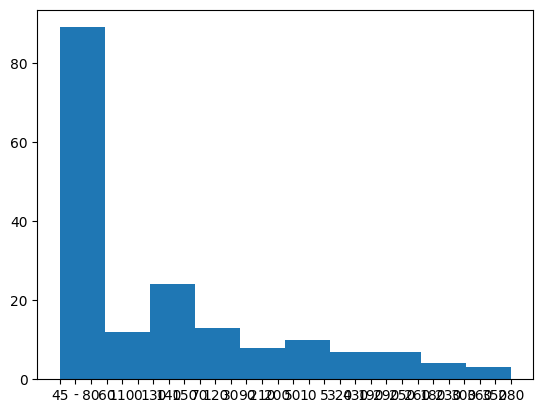

In [89]:
#creating histogram
plt.hist(df_nd['Calories'], bins = 10)

(array([91., 18., 11., 23.,  9.,  6.,  7.,  3.,  3.,  6.]),
 array([ 0. ,  3.3,  6.6,  9.9, 13.2, 16.5, 19.8, 23.1, 26.4, 29.7, 33. ]),
 <BarContainer object of 10 artists>)

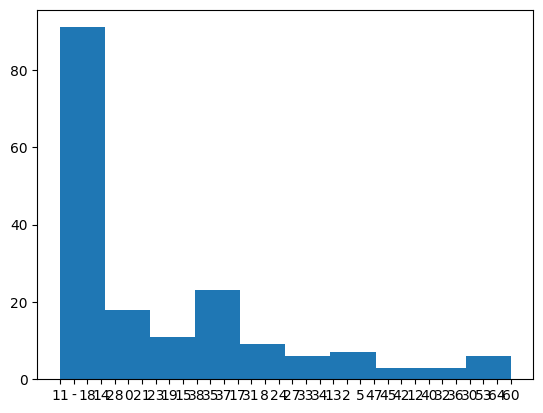

In [90]:
plt.hist(df_nd['Carb. (g)'], bins = 10)

<Axes: ylabel='Sodium'>

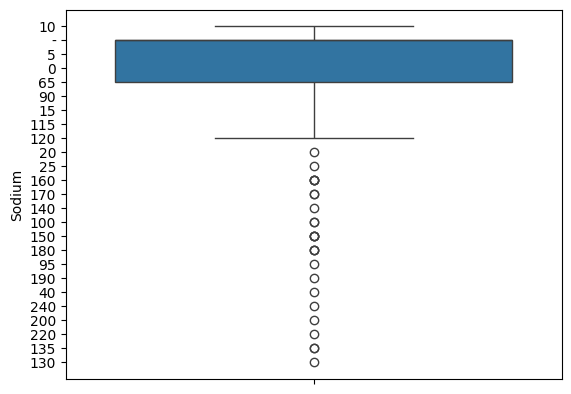

In [91]:
#Creating a boxplot
sns.boxplot(df_nd['Sodium'])

<Axes: ylabel='Fat (g)'>

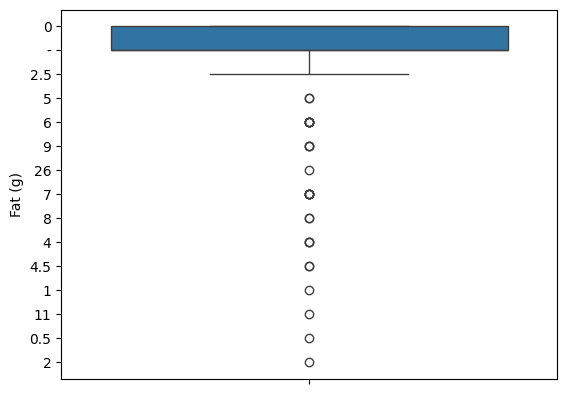

In [92]:
sns.boxplot(df_nd['Fat (g)'])